**<h1>Problem Statement</h1>**

<li><b>According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally.</b></li>

<li><b>Stroke is responsible for approximately 11% of total deaths in the world</b></li>

<li><b>The dataset is provided to predict whether a patient is likely to get stroke or not on the basis of given input parameters</b></li>

<li><b>Each row in the data provides relavant information about the patient.</b></li>

<li><b>After going through the context of datasets, we can say that it is a binary classification problem</b></li>

<li><b>We have to make prediction on the target variable STROKE</b></li>

<li><b>Finally, we have to build a model to get the best prediction on the stroke variable</b></li>





___________________________________________________________

**<h4>Let's get started</h4>**


___________________________________________________________

**<h4>Importing all necessary libraries</h4>**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,recall_score,confusion_matrix,roc_auc_score,precision_score,f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, SelectFromModel, f_classif


from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

<h4><b>Loading the dataset in a pandas dataframe</b></h4>

In [3]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(dataset.shape)
dataset.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**<h1>Insights From First Glance</h1>**

<li><b>In our dataset, we have both numerical and categorical variables.</b></li>

<li><b>There are 5110 rows and 12 columns in the dataset.</b></li>

<li><b>There are seven numerical variables and 5 categorical variables.</b></li>

<li><b>The most important one to look for is our target variable 'stroke'.</b></li>

<li><b>'Stroke' is detected as an integer, not as an object.</b></li>

<li><b>Target variable is coded as 1 for positive cases (has a stroke) and 0 for negative cases (does not have a stroke).</b></li>

<li><b>Both 'hypertension' and 'heart_disease" are detected as an integer, not as an object.</b></li>

<li><b>From the data definition part, they are coded as 1 for the positive cases (has hypertension/heart disease)</b></li>

<li><b>And 0 for the negative cases (does not have hypertension/heart disease)</b></li>

<li><b>We don't need to change them, but it is good to see and be aware of them</b></li>

<li><b>We have 5 categorical variables, which we have to encode as numerical</li></b>

<li><b>We can also see that there are missing values in the 'bmi' column</b></li>


**<h1>Exploratory Data Analysis</h1>**

**<h4>Checking Missing Values</h4>**

In [5]:
def check_missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values


In [6]:
check_missing_values(dataset)

,Missing_Number,Missing_Percent
bmi,201,3.933464
stroke,0,0.000000
smoking_status,0,0.000000
avg_glucose_level,0,0.000000
Residence_type,0,0.000000
work_type,0,0.000000
ever_married,0,0.000000
heart_disease,0,0.000000
hypertension,0,0.000000
age,0,0.000000


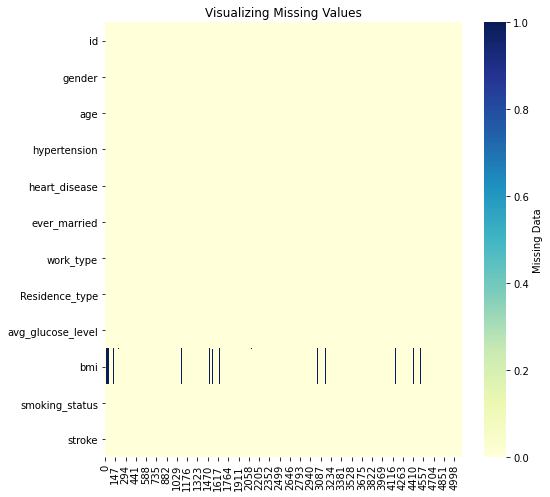

In [7]:
plt.figure(figsize=(8,8))
plt.title('Visualizing Missing Values')
sns.heatmap(dataset.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

<li><b>We have 201 missing values in 'bmi' column which is 4% of the whole datasets</li></b>

<li><b>It seems like we have random missing values.. There is no pattern in missing values</b></li>

<li><b>We will handle the missing values after encoding every categorical variables to numerical variables during the model preparation phase.</b></li>

<li><b>Let's see our categorical and numerical values separately</b></li>



**<h3>Categorical Variables and Univariate Analysis</h3>**



In [8]:
def categories_count (df,col_name):
    count = df[col_name].value_counts().tolist()
    categories = df[col_name].value_counts().index.tolist()
    count_df = pd.DataFrame({'Column_Name' : categories, 'Count' : count})
    return count_df

In [9]:
def univariate_barplot(df,xlabel,ylabel="Frequency"):
  ax=plt.figure(figsize=(6,6))
  ax = sns.barplot()
  ax = sns.barplot(x='Column_Name',y='Count',data = df)
  ax.set_title("Distribution of {} in the dataset".format(xlabel))
  ax.set(xlabel=xlabel, ylabel=ylabel)
  total = df['Count'].sum()
  for p in ax.patches:
    height = p.get_height()
    height_percentage = "{:.1f}%".format((100 * height)/ total)
    ax.text(p.get_x()+p.get_width()/2., height + 5,height_percentage ,ha="center")
  plt.show()

**<h5>Gender</h5>**

posx and posy should be finite values
posx and posy should be finite values


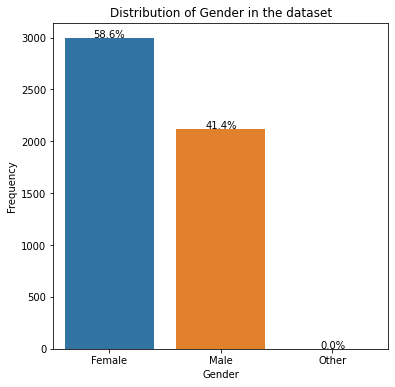

In [10]:
count_df = categories_count(dataset,'gender')
univariate_barplot(count_df,xlabel='Gender')

<li><b>Only one row belongs to gender 'other'.</b></li>
<li><b>We are dropping this single row and then encoding the other two features into a single column.</b></li>
<li><b>We will use label encoder to encode gender column after dropping the row.</b></li> 
<li><b>58.6% of people are female and 41.4% female are males and almost 0% of people belong to other gender.</b></li>



In [11]:
dataset = dataset.loc[dataset['gender']!='Other',:]
dataset.reset_index(drop=True,inplace=True)

**<h4>ever_married</h4>**

posx and posy should be finite values
posx and posy should be finite values


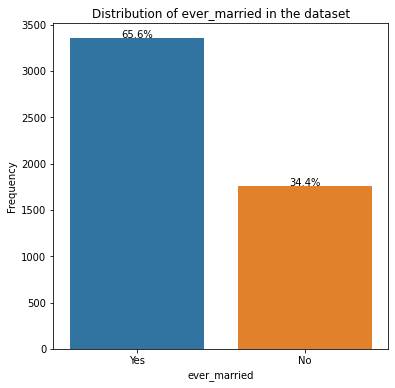

In [12]:
count_df = categories_count(dataset,'ever_married')
univariate_barplot(count_df,xlabel='ever_married')

<ul>
<li><b>This feature has two categorical values: </b></li>
<ul>
<li><b>'Yes' indicating marital status as married</b></li>
  <li><b> 'No' indicating marital status as unmarried</b></li>
</ul>
<li><b>65.6% of people are married and 34.4% of people are unmarried.</b></li>
</ul>

**<h4>Residence_type</h4>**

posx and posy should be finite values
posx and posy should be finite values


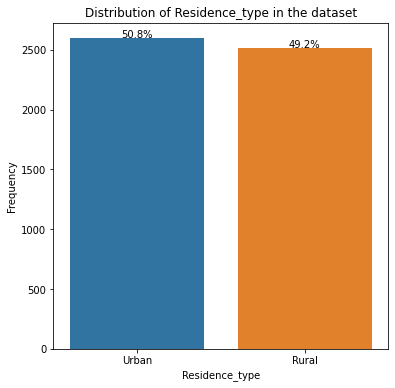

In [13]:
count_df = categories_count(dataset,'Residence_type')
univariate_barplot(count_df,xlabel='Residence_type')

<li><b>This feature has two categorical values: 1) Urban and 2) Rural </b></li>
<li><b>50.8% of people are living in Urban area whereas 49.2% of people are living in Rural areas.</b></li>


**<h4>work_type</h4>**

posx and posy should be finite values
posx and posy should be finite values


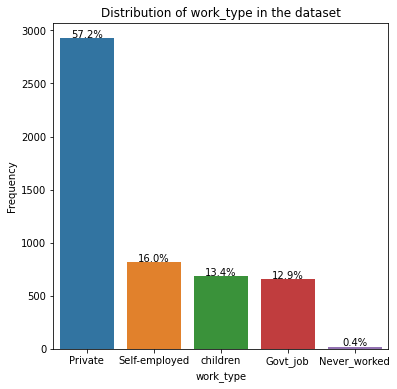

In [14]:
count_df = categories_count(dataset,'work_type')
univariate_barplot(count_df,xlabel='work_type')

<li><b>'children' does not seem to be the work_type</b></li>
<li><b>57.2 % of people work in private companies, 16 % of people are self-employed and 12.9 % of people work in government jobs</b></li>
<li><b>Whereas 13.4 % of people are children and 0.4 % of people have never worked.</b></li>
<li><b>We cannot draw meaningful conclusion about appropriate age group for certain worktypes through univariate analysis only.</b></li>
<li><b>Let's explore this feature using multivariate analysis to get more insights on the data</b></li>

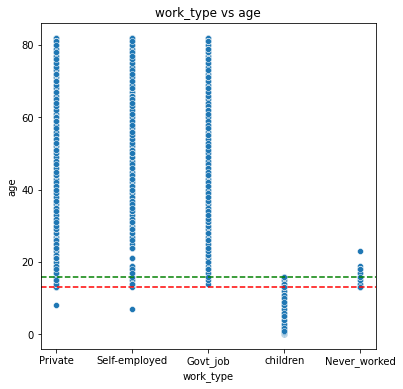

In [15]:
  ax=plt.figure(figsize=(6,6))
  ax = sns.scatterplot(x='work_type',y='age',data = dataset)
  ax.set_title('work_type vs age')
  ax.set(xlabel='work_type', ylabel='age')
  plt.axhline(y=13, c='red', linestyle='dashed')
  plt.axhline(y=16, c='green', linestyle='dashed')
  plt.show()

**<h4>Let's make some assumptions on data</h4>**

<li><b>Bivariate analysis is done to understand appropriate age group for certain work types.</b></li>

<li><b>Since, children are not allowed to work so we can change these values to Never_worked category.</b></li>

<li><b>Let's assume that people below 13 years age can not be employed for a private job as it is a minimum criteria for many different countries.</b></li>

<li><b>Let's assume that the people below 16 years of age can not be employed for a government job as it is a minimum criteria.</b></li>

<li><b>These days lots of people can be self-employed from youtube. However, the minimum age limit for youtuber is 13 years.</b></li>

<li><b>Considering this situation, let's assume that the minimum age limit for being self-employed to be 13 years.</b></li>

<li><b>Then only, we will encode these values to numerical values</b></li>

In [16]:
dataset.loc[dataset['work_type']=="children",'work_type'] = 'Never_worked'
dataset.loc[(dataset['work_type']=='Private') & (dataset['age'] < 13),"age"] = 13
dataset.loc[(dataset['work_type']=='Govt_job') & (dataset['age'] < 16),"age"] = 16
dataset.loc[(dataset['work_type']=='Self-employed') & (dataset['age'] < 13),"age"] = 13

posx and posy should be finite values
posx and posy should be finite values


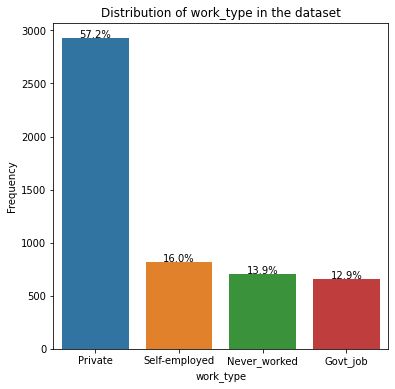

In [17]:
count_df = categories_count(dataset,'work_type')
univariate_barplot(count_df,xlabel='work_type')

**<h4>Smoking Status</h4>**

posx and posy should be finite values
posx and posy should be finite values


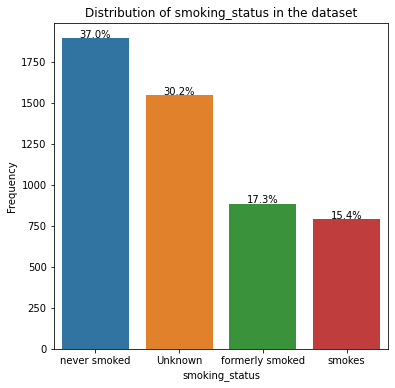

In [18]:
count_df = categories_count(dataset,'smoking_status')
univariate_barplot(count_df,xlabel='smoking_status')

<li><b>37 % of people never smoked, 30.2 % of people's smoking status is unknown.</b></li>

<li><b>Whereas 17.3 % people smoking status is formorly smoken and 15.4 % are regular smokers.</b></li>

<li><b>Since, 30.2 % people's smoking status is unknown, let's explore the age group of those people for drawing more insights.</b></li>


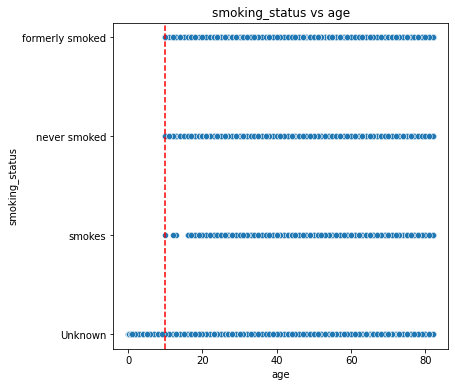

In [19]:
ax=plt.figure(figsize=(6,6))
ax = sns.scatterplot()
ax = sns.scatterplot(x='age',y='smoking_status',data = dataset)
ax.set_title('smoking_status vs age')
ax.set(xlabel='age', ylabel='smoking_status')
plt.axvline(x=10, c='red', linestyle='dashed')
plt.show()



**<h6>Let's make some assumptions on data</h6>**

<li><b>We can clearly see that people below 10 years are not found smoking in this dataset.</b></li>

<li><b>Let's make an assumption that person below 10 years can not smoke</b></li>

<li><b>But there are some people whose smoking status is unknown even if they are below that age limit</b></li>

<li><b>People whose smoking status is unknown and below 10 years age limit will be changed to never smoked</b></li>

<li><b>Then only, we will encode the values to numerical values</b></li>

In [20]:
dataset.loc[(dataset['smoking_status']=="Unknown") & (dataset['age'] < 10),"smoking_status"] = "never smoked" 
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**<h4>Hypertension</h4>**

posx and posy should be finite values
posx and posy should be finite values


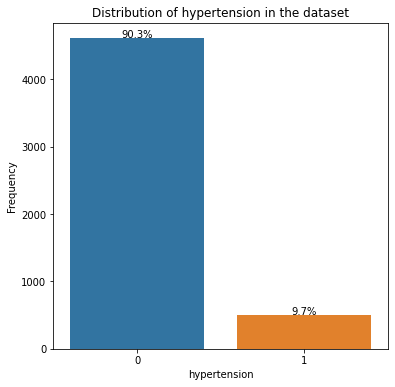

In [21]:
count_df = categories_count(dataset,'hypertension')
univariate_barplot(count_df,xlabel='hypertension')

<li><b>We have 498 patient with hypertension which represents at around 10 % of the sample.</b></li>
<li><b>More than 90% same represent the people with no hypertension in the datasets</b></li>

**<h4>Heart Disease</h4>**

posx and posy should be finite values
posx and posy should be finite values


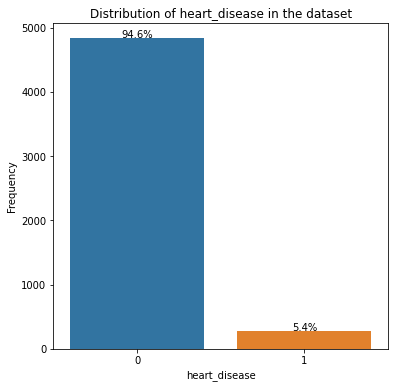

In [22]:
count_df = categories_count(dataset,'heart_disease')
univariate_barplot(count_df,xlabel='heart_disease')

<li><b>We have 276 patient with heart disease which is 5.4 % of the sample.</b></li>
<li><b>More than 94% of samples belong to the people with no heart disease</b></li>

**<h4>Bivariate Analysis</h4>**

In [23]:
def feature_impact_probability(df,features,values):
  with_feature_count = df[df[features[0]]==values[1]][features[1]].value_counts()[1]
  with_feature_total_count = df.loc[df[features[0]]==values[1],features[0]].value_counts().sum()
  without_feature_count = df[df[features[0]]==values[0]][features[1]].value_counts()[1]
  without_feature_total_count = len(df) - with_feature_total_count
  with_feature_probability = round((with_feature_count / with_feature_total_count) * 100, 2)
  without_feature_probability = round((without_feature_count / without_feature_total_count) * 100, 2)
  return with_feature_probability, without_feature_probability

**<h6>Hypertension and Stroke</h6>**

In [24]:
fig = px.histogram(dataset, x="hypertension", color="stroke",width=400, height=400)
fig.show()

In [25]:
with_hypertension_probablity , without_hypertension_probability = feature_impact_probability(dataset,['hypertension','stroke'],[0,1])
print(with_hypertension_probablity)
print(without_hypertension_probability)

13.25
3.97


<li><b>As we have seen, stroke probability for those who has hypertension are quite different than for those who don't.</b></li>

<li><b>People with hypertension are 13.25% likely to get strokes.</b></li>

<li><b>People without hypertension are only 3.97% likely to get strokes.</b></li>

<li><b>It means that person with hypertension are almost 3.3 time more likely to get stroke than the ones who don't have hypertension.</b></li>

**<h4>Gender and Stroke</h4>**

In [26]:
fig = px.histogram(dataset, x="gender", color="stroke",width=400, height=400)
fig.show()

In [27]:
male_probablity , female_probability = feature_impact_probability(dataset,['gender','stroke'],['Female','Male'])
print(male_probablity)
print(female_probability)

5.11
4.71


<li><b>Male compare to female are more likelyto get stroke, but difference between female and male is very small.</b></li>

<li><b>Male population are 5.11% likely to get strokes.</b></li>

<li><b>Female population are 4.71% likely to get strokes.</b></li>

<li><b>It means that person with heart disease are only 1.08 times more likely to get stroke than the ones who don't have hypertension.</b></li>


**<h4>Heart Disease and Stroke</h4>**

In [28]:
fig = px.histogram(dataset, x="heart_disease", color="stroke",width=400, height=400)
fig.show()

In [29]:
with_heart_disease_probability , without_heart_disease_probability = feature_impact_probability(dataset,['heart_disease','stroke'],[0,1])
print(with_heart_disease_probability)
print(without_heart_disease_probability)

17.03
4.18


<li><b>People with heart disease are 17.03% likely to get strokes.</b></li>

<li><b>People without heart disease are only 4.18% likely to get strokes.</b></li>

<li><b>It means that person with heart disease are almost 4.07 times more likely to get stroke than the ones who don't have hypertension.</b></li>

**<h4>Married and Strokes</h4>**

In [30]:
fig = px.histogram(dataset, x="ever_married", color="stroke",width=400, height=400)
fig.show()

In [31]:
with_marriage_probability , without_marriage_probability = feature_impact_probability(dataset,['ever_married','stroke'],['No','Yes'])
print(with_marriage_probability)
print(without_marriage_probability)

6.56
1.65


<li><b>Married people are 6.56% likely to get strokes.</b></li>

<li><b>Unmarried people are only 1.65% likely to get strokes.</b></li>

<li><b>It means that married people are almost 3.98% times more likely to get stroke than the unmarried ones.</b></li>

**<h4>Residence Type and Stroke</h4>**

In [32]:
fig = px.histogram(dataset, x="Residence_type", color="stroke",width=400, height=400)
fig.show()

In [33]:
rural_probability , urban_probability = feature_impact_probability(dataset,['Residence_type','stroke'],['Rural','Urban'])
print(rural_probability)
print(urban_probability)

5.2
4.54


<li><b>People dwelling in rural areas are 5.2% likely to get strokes.</b></li>

<li><b>People dwelling in urban areas are only 1.65% likely to get strokes.</b></li>

<li><b>It means that people dwelling in rural areas are almost 1.15% times more likely to get stroke than the people dwelling in urban areas.</b></li>




**<h4>Work Type and Stroke</h4>**

In [34]:
fig = px.histogram(dataset, x="work_type", color="stroke",width=400, height=400)
fig.show()

In [35]:
print (f'A person with private work type has a probability of {round(dataset[dataset["work_type"]=="Private"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'Self-employed person has a probability of {round(dataset[dataset["work_type"]=="Self-employed"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person with a goverment job has a probability of {round(dataset[dataset["work_type"]=="Govt_job"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never worked has a probability of {round(dataset[dataset["work_type"]=="Never_worked"]["stroke"].mean()*100,2)} % get a stroke')

A person with private work type has a probability of 5.1 % get a stroke

Self-employed person has a probability of 7.94 % get a stroke

A person with a goverment job has a probability of 5.02 % get a stroke

A person never worked has a probability of 0.28 % get a stroke


<li><b>Self employed person has more probability to get stroke than other work type.</b></li>

<li><b>This data suggests that if you have never worked, you will not die by stroke !!! Only 0.28% of people who never worked are likely to get stroke.</b></li>

<li><b>Person with private job and goverment job almost has same probability to get stroke.</b></li>



**<h4>Smoking and Stroke</h4>**

In [36]:
fig = px.histogram(dataset, x="smoking_status", color="stroke",width=400, height=400)
fig.show()

In [37]:
print (f'A formerly smoked person has a probability of {round(dataset[dataset["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never smoked has a probability of {round(dataset[dataset["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person smokes has a probability of {round(dataset[dataset["smoking_status"]=="smokes"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person whom smoking history is not known,has a probability of {round(dataset[dataset["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)} % get a stroke')



A formerly smoked person has a probability of 7.92 % get a stroke

A person never smoked has a probability of 3.85 % get a stroke

A person smokes has a probability of 5.32 % get a stroke

A person whom smoking history is not known,has a probability of 4.28 % get a stroke


<li><b>There are differeneces based on the smoking habits.</b></li>

<li><b>A formerly smoked person has a probability to get stroke 1.66 times more than person never smoked.</b></li>

<li><b>A person smokes has a a probability to get stroke 1.11 times more than person never smoked.</b></li>

<li><b>It is smal difference between who smokes and who does not smoke in regard to probability of getting stroke.</b></li>


**<h4>Numerical Columns</h4>**

**<h6>Univariate Analysis For Numerical Columns</h4>**

In [38]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

numerical = ['age','avg_glucose_level', 'bmi']

In [39]:
dataset[numerical].describe()

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,4908.00000
mean,43.232727,106.140399,28.89456
std,22.609703,45.285004,7.85432
min,0.080000,55.120000,10.30000
25%,25.000000,77.240000,23.50000
50%,45.000000,91.880000,28.10000
75%,61.000000,114.090000,33.10000
max,82.000000,271.740000,97.60000


<li><b>We have three numerical features in our dataset.</b></li>

<li><b>All of our numerical features are measured in different scales.</b?</li>

<li><b>Based on the mean & median score differences, we can expect.</b></li>

<li><b>Slightly left skew on the 'age' (mean: 43.23 & median: 45).</li></b>

<li><b>Slightly right skew on the 'bmi' (mean: 28.89 & median: 28.10).</b></li>

<li><b>And right skew distribution on the 'avg_glucose_level' (mean: 106.14 & median: 91.88).</b></li>

<li><b>Let's see the skewness present in the data.</b></li>

In [40]:
dataset[numerical].skew()

age                 -0.137134
avg_glucose_level    1.572815
bmi                  1.055063
dtype: float64

In [41]:
def distplot(df):
  fig = plt.figure(figsize=(15,10))
  for i, column in enumerate(dataset[numerical].columns, 1):
    plt.subplot(3,3,i)
    plt.xlabel(column)
    sns.distplot(dataset[numerical][column])
    fig.show()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



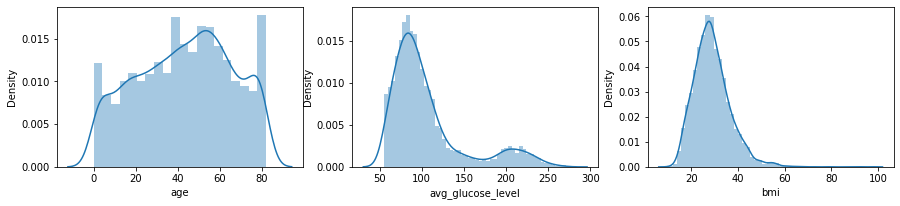

In [42]:
distplot(dataset[numerical])

<li><b>As seen in in both skewness result, numerical features have skewness in different degrees.</b></li>

<li><b>Age column is left skewed, Avg_glucose_level is right skewed and bmi is also right skewed.</b></li>

<li><b>We will deal with different scale and skewness during the last past in the eda by using different transformation techniques</b></li>


**<h4>Bivariate Analysis : Correlation Matrix & Scatter Plots</h4>**

In [43]:
dataset[numerical].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238318,0.333244
avg_glucose_level,0.238318,1.000000,0.175672
bmi,0.333244,0.175672,1.000000


<li><b>There is very small positive correlation between numerical features.</b></li>

<li><b>Let's see the correlation of numerical variables with the target variable</b></li>


In [44]:
dataset[['age','avg_glucose_level','bmi','stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238318,0.333244,0.245253
avg_glucose_level,0.238318,1.000000,0.175672,0.131991
bmi,0.333244,0.175672,1.000000,0.042341
stroke,0.245253,0.131991,0.042341,1.000000


<li><b>When age increases, also the mean score on the stroke also increases.</b></li>

<li><b>Average glucose level's mean scores have differences between a person who has a stroke or not.</b?</li>

<li><b>Bmi mean scores are close to each other.</b></li>

<li><b>Correlations with the target variable are very small.</b></li>

<li><b>Among all numerical features, age is the most dominant feature with a correlation of 0.24</b></li>



**<h4><li>Let's finally see the scatter plots</li><h4>**



In [45]:
def scatter_plot(df,features,color_choice):
  fig = px.scatter(df,x=features[0],y=features[1],title="{} and {}".format(features[0],features[1]),
                   color=features[2],color_continuous_scale=color_choice,hover_data=df[[features[2]]])
  fig.show()

**<h6> Age and BMI column</h6>**

In [46]:
scatter_plot(df=dataset,features=['age','bmi','stroke'],color_choice = "magenta")

<li><b>People with age greater than 45 years are likely to get a heart stroke than below age groups.</b></li>

<li><b>Very few people have bmi greater than 60</b></li>


**<h4>Age and Average Glucose Level</h4>**

In [47]:
scatter_plot(df=dataset,features=['age','avg_glucose_level','stroke'],color_choice = "sunset")

<li><b>From this scatterplot, we can see that people with age greater than 45 years are more likely to get a stroke</b></li>

<li><b>People with avg_glucose level higher than 150 mm are more likely to get a stroke than people with lower glucose level than that.</b></li>


**<h4>BMI and Average Glucose Level</h4>**

In [48]:
scatter_plot(df=dataset,features=['bmi','avg_glucose_level','stroke'],color_choice = "temps")

<li><b>Very few people have bmi less than 60 and there is presence of some outliers in bmi value.</b></li>

<li><b>If avg_glucose_level of a person goes higher than 150 mm then, the probability of getting stroke also increases.</li></b>

**<h4>Encoding categorical values for filling the missing values</h4>**

In [49]:
def label_encoder(df,col_name):
  encoder = LabelEncoder()
  df[col_name] = encoder.fit_transform(df[col_name])
  return encoder, df

def one_hot_encoder(df,col_name):
  dummies = pd.get_dummies(df[col_name])
  df = pd.concat([df,dummies],axis=1)
  return df

In [50]:
encoded_dataset = dataset.copy()

gender_encoder, encoded_dataset = label_encoder(encoded_dataset,'gender')


married_encoder, encoded_dataset = label_encoder(encoded_dataset,'ever_married')


residence_encoder, encoded_dataset = label_encoder(encoded_dataset,'Residence_type')


encoded_dataset = one_hot_encoder(encoded_dataset,'work_type')
encoded_dataset.drop(['Never_worked','work_type'],axis='columns',inplace=True)



encoded_dataset = one_hot_encoder(encoded_dataset,'smoking_status')
encoded_dataset.drop(['Unknown','smoking_status'],axis='columns',inplace=True)

encoded_dataset.drop(['id'],axis='columns',inplace=True)



**<h4>Filling missing values in bmi column</h4>**

In [51]:
from sklearn.impute import KNNImputer
imputter = KNNImputer(n_neighbors=30)
filled_values = imputter.fit_transform(encoded_dataset)


columns = encoded_dataset.columns.tolist()
encoded_dataset = pd.DataFrame(data=filled_values,columns=columns)



<li>291 missing rows of bmi column is imputted using knn imputation method.</li>

<li>We have choose k = 30 as the nearest value to predict our missing values using knn algorithm.</li>

<li>For using imputation techniques, we have encoded our feature variables before train_test split.</li>

<li>The encoding will again be done after splitting the datasets. Here, it is done ahead to fill the missing values only.</li>

<li>We usually do train test split before encoding categorical variables to prevent from data leakage problems.</li>

<li>Filling the missing rows in an original dataset and then performing outlier analysis.</li>

In [52]:
dataset['bmi'] = encoded_dataset['bmi']

**<h4>Outlier Analysis For Numerical Columns</h4>**

**<h6>Age</h6>**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



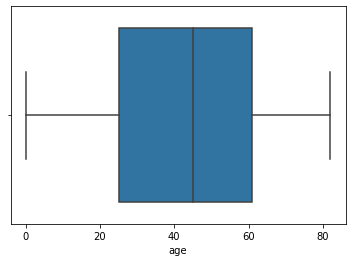

In [53]:
sns.boxplot(dataset['age'])

<li>There is no presence of outlier in Age column.</li>

**<h6>BMI</h6>**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



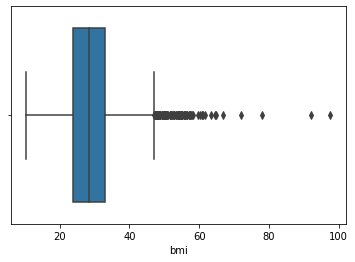

In [54]:
sns.boxplot(dataset['bmi'])

<li>From the given boxplot, we can see that there are many values that is beyond the 3 standard deviation.</li>

<li>Since, the bmi column is not gaussian distributed, so we have to use inter quantile range for detecting the outliers</li>

In [55]:
def iqrrange(df):
  quantile1, quantile3 = np.percentile(df,[25,75])
  iqr_value = quantile3 - quantile1
  lower_bound = quantile1 - 1.5 * iqr_value
  upper_bound = quantile3 + 1.5 * iqr_value
  return lower_bound, upper_bound

In [56]:
lower, higher = iqrrange(dataset['bmi'])
dataset.loc[(dataset['bmi'] < lower) | (dataset['bmi'] > higher),"bmi"] = dataset.loc[(dataset['bmi'] < lower) | (dataset['bmi'] > higher),"bmi"].mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



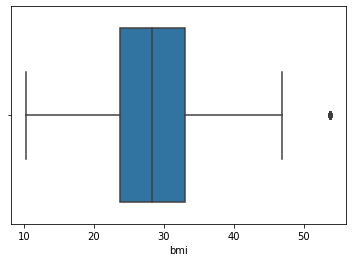

In [57]:
sns.boxplot(dataset['bmi'])

<li>It is not always that outliers are not important for predictive modelling.</li>

<li>In predicting minority class in a class imbalance problem, outliers can play an important role for our model.</li>

<li>Since, we also have class imbalance problem in our dataset, we donot remove the outliers.</li>

<li>Instead of removing it, we have to deal with it smartly.</li>

<li>So I have replace the extreme outlier values with the mean of values that are deviated from the inter quantile range.</li>

**<h4>Average Glucose Level</h4>**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



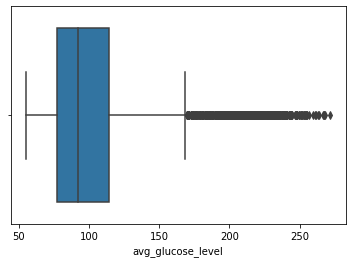

In [58]:
sns.boxplot(dataset['avg_glucose_level'])

<li>From the given boxplot, we can see that there are many values that is beyond the 3 standard deviation.</li>

<li>Since, the avg_glucose_level column is not gaussian distributed, so we have to use inter quantile range for detecting the outliers.</li>

In [59]:
lower, higher = iqrrange(dataset['avg_glucose_level'])
dataset.loc[(dataset['avg_glucose_level'] < lower) | (dataset['avg_glucose_level'] > higher),"avg_glucose_level"] = dataset.loc[(dataset['avg_glucose_level'] < lower) | (dataset['avg_glucose_level'] > higher),"avg_glucose_level"].mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



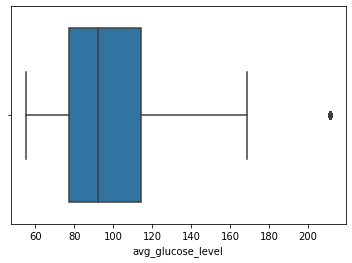

In [60]:
sns.boxplot(dataset['avg_glucose_level'])

<li>The avg_glucose_level values beyond 170 are outliers.</li>

<li>When we recall our findings from multivariate analysis, we have found that the people having avg_glucose_level above 160 are more likely to get stroke.</li>

<li>Since, this outlier can be useful for our problem, we have to keep this outlier values for our predictinve modelling.</li>

<li>Instead of removing it, we have to deal with it smartly.</li>

<li>So I have replace the extreme outlier values with the mean of values that are deviated from the inter quantile range.</li>

**<h4>Insights From Exploratory Data Analysis</h4>**

<li><b>Age and target variable weak positive relationship (almost .25).</b></li>

<li><b>Average glucose level's mean scores on the target have differences between a person who has a stroke or not. But this differences are small.</b></li>

<li><b>BMI does not have any significant relationship with the target variable.</b>

<li><b>A person with hypertension are almost 3.3 time more likely to get stroke than the ones who don't have hypertension.</b></li>

<li><b>Male compare to female are more likely to get stroke, but difference between female and male is very small.</b></li>

<li><b>A person with heart diease are 4.07 times more likely to get stroke than the ones who don't have heart disease.</b></li>

<li><b>A person is married(or married before) are 5.7 times more likely to get stroke than the ones who don't have marriage history.</b></li>

<li><b>Self employed person has more probability to get stroke than other work type.</b></li>

<li><b>Person who lives in rural area slightly has more probablity to get sroke than a person who lives in rural area. Difference is small.</b></li>

<li><b>It is smal difference between who smokes and who does not smoke in regard to probability of getting stroke.</b></li>

**<h2>Target Variable</h2>**

<li>One of the first steps of exploratory data analysis should always be to look at what the values of y look like.</li>

posx and posy should be finite values
posx and posy should be finite values


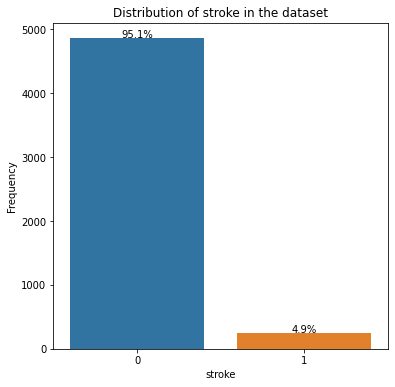

In [61]:
count_df = categories_count(dataset,'stroke')
univariate_barplot(count_df,xlabel='stroke')

<li>Almost %95 of the instances of our target variable is 'No stroke'</li>
<li>4861 patient does not have a stroke.</li>
<li>%5 of the instances of our target variable is 'Stroke'.</li>
<li>249 patient have a stroke.</li>
<li>We have imbalanced data.</li>
<li>Our stroke dataset is an example of a so-called imbalanced dataset.</li>
<li>There are 19 times more people who didn’t have stroke in our data than who had, and we say that the non-stroke class dominates the stroke class.</li>
<li>We can clearly see that: the stroke rate in our data is 0.048
Which is a strong indicator of class imbalance</li>



**<h4>Imbalance Datasets</h4>**

<li>Instances across classes are imbalanced, like in our dataset, we have imbalance data.</li>

<li>The problem is, most of the machine learning algorithm do not work well with the imbalanced data.</li>

<li>Some of the metrics (like accuracy) give us misleading results.</li>

<li>Most of the time in classification problems our interest is to get better predict on the minority class.</li>

<li>In our example: People had a stroke is minority class.</li>

<li>Otherwise our machine learning algorithm falsely predicts majority class.</li>

<li>In our example: No stroke is majority class.</li>

**<h2>Feature Engineering</h2>**

**<h4>Data Preparation and Model Building<h4>**



In [98]:
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size = 0.2,random_state=42,shuffle=True)
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [100]:
print("Distribution of y_train = {}".format(y_train.value_counts()))
print("Distribution of y_test = {}".format(y_test.value_counts()))

Distribution of y_train = 0    3888
1     199
Name: stroke, dtype: int64
Distribution of y_test = 0    972
1     50
Name: stroke, dtype: int64


**<h4>Encoding Categorical Variables</h4>**

In [101]:
sex_encoder, x_train = label_encoder(x_train,'gender')
x_test['gender'] = sex_encoder.transform(x_test['gender'])

marital_status_encoder, x_train = label_encoder(x_train,'ever_married')
x_test['ever_married'] = marital_status_encoder.transform(x_test['ever_married'])


residence_location_encoder, x_train = label_encoder(x_train,'Residence_type')
x_test['Residence_type'] = residence_location_encoder.transform(x_test['Residence_type'])

x_train = one_hot_encoder(x_train,'work_type')
x_train.drop(['Never_worked','work_type'],axis='columns',inplace=True)
x_test = one_hot_encoder(x_test,'work_type')
x_test.drop(['Never_worked','work_type'],axis='columns',inplace=True)

x_train = one_hot_encoder(x_train,'smoking_status')
x_train.drop(['Unknown','smoking_status'],axis='columns',inplace=True)
x_test = one_hot_encoder(x_test,'smoking_status')
x_test.drop(['Unknown','smoking_status'],axis='columns',inplace=True)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

<li>In gender column, female is encoded to 0 and male is encoded to 1.</li>

<li>In 'ever_married' column, the 'Yes' is converted to 1 and 'No' is converted to 0.</li>

<li>This means married people are encoded to 0 and unmarried people are encoded to 1</li>

<li>In Residence_type column, Rural is encoded to 0 and Urban is encoded to 1.</li>
<li>work_type and status columns are one hot encoded.</li>

<li>When we convert the features as one hot encoded, we have to remove the dummy variable trap.</li>

<li>Never_worked feature and Unknowing smoking status are removed from our features to remove dummy variable trap.</li>



In [102]:
print(x_train.shape)
x_train.head()

(4087, 14)


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Govt_job,Private,Self-employed,formerly smoked,never smoked,smokes
0,0,48.0,0,0,1,1,69.21,33.1,0,1,0,0,1,0
1,0,29.0,0,0,0,1,84.19,21.2,0,1,0,0,1,0
2,0,35.0,0,0,1,0,119.40,22.9,0,1,0,0,1,0
3,1,38.0,0,0,1,0,108.68,32.7,0,1,0,0,1,0
4,1,16.0,0,0,0,1,82.34,31.6,1,0,0,0,0,0


In [103]:
print(x_test.shape)
x_test.head()

(1022, 14)


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Govt_job,Private,Self-employed,formerly smoked,never smoked,smokes
0,0,28.0,1,0,1,0,83.66,36.4,1,0,0,0,1,0
1,0,3.0,0,0,0,1,93.30,19.5,0,0,0,0,1,0
2,0,53.0,0,0,1,0,64.40,31.0,1,0,0,0,0,1
3,1,35.0,0,0,1,0,69.22,42.8,0,1,0,0,1,0
4,0,58.0,0,0,1,0,94.30,29.1,0,1,0,0,0,0


**<h4>Feature Scaling</h4>**

In [104]:
# fit on training data column
scale = StandardScaler()

x_train[['age','avg_glucose_level','bmi']] = scale.fit_transform(x_train[['age','avg_glucose_level','bmi']])

x_test[['age','avg_glucose_level','bmi']] = scale.transform(x_test[['age','avg_glucose_level','bmi']])


**<h4>Model Preparation</h4>**

**<h6>Decide the metric</h6>**

<li>This is the first step when approaching a machine learning problem: decide the metric!</li>

<li>The choice of the wrong metric can mean choosing the wrong algorithm.</li>

<li>We see that the target is skewed and thus the best metric for this binary classification problem would be <b>Area Under the ROC Curve (AUC).</b></li>

<li>We can use <b>precision and recall</b> too, but AUC combines these two metrics.</li>

<li>We have already seen the label/target distribution, and we know that it is a binary classification problem with skewed targets.</li>

<li>Just for further info, it is not advisable to use accuracy as an evaluation metric, when dealing with higly imbalanced data.</li>

**<h6>Model Selection</h6>**

<li>We will explore multiple models : <b>Logistic Regression, Decision Trees and Random Forests</b></li>

<li>Decide which model perform the best in the evaluated models.</li>

<li><b>Let's start by creating a Logistic Regression Model at first.</b></li>

In [105]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier()
}



In [106]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.


In [108]:
print("Model Performance\n-----------------")
for name, model in models.items():
    y_pred = model.predict(x_test)
    print(
        "\n" + name + " Roc Auc Score: {:.3f}%\n\t\t\t\t       F1-Score: {:.5f}"\
        .format(roc_auc_score(y_test, y_pred) * 100, f1_score(y_test, y_pred))
    )

Model Performance
-----------------

                   Logistic Regression Roc Auc Score: 50.000%
				       F1-Score: 0.00000

                   K-Nearest Neighbors Roc Auc Score: 50.897%
				       F1-Score: 0.03774

                         Decision Tree Roc Auc Score: 52.222%
				       F1-Score: 0.09174

Support Vector Machine (Linear Kernel) Roc Auc Score: 50.000%
				       F1-Score: 0.00000

   Support Vector Machine (RBF Kernel) Roc Auc Score: 50.000%
				       F1-Score: 0.00000

                         Random Forest Roc Auc Score: 49.949%
				       F1-Score: 0.00000

                     Gradient Boosting Roc Auc Score: 51.743%
				       F1-Score: 0.07018

                               XGBoost Roc Auc Score: 49.949%
				       F1-Score: 0.00000

                              LightGBM Roc Auc Score: 52.434%
				       F1-Score: 0.09375


<li>The model has very less roc auc score.</li>

<li>LightGBM and Decision Tree Forest were able to get a F1 score of around 9% which is very low. </li>

<li>The models like Logistic Regression and SVM is not detecting any stroke cases</li>

<li>Since, the target class is only 5% of the whole dataset. So, we are facing this issue.</li>

<li><b>Let's do oversampling of underrepresented class on our training set to handle class imbalance problem</b></li>

In [109]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train,y_train = smote.fit_resample(x_train,y_train)
print(len(x_train))
print(len(y_train))

7776
7776


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [110]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.


In [111]:
print("Model Performance\n-----------------")
for name, model in models.items():
    y_pred = model.predict(x_test.values)
    print(
        "\n" + name + " Roc Auc Score: {:.3f}%\n\t\t\t\t       F1-Score: {:.5f}"\
        .format(roc_auc_score(y_test, y_pred) * 100, f1_score(y_test, y_pred))
    )

Model Performance
-----------------

                   Logistic Regression Roc Auc Score: 77.728%
				       F1-Score: 0.23496

                   K-Nearest Neighbors Roc Auc Score: 59.798%
				       F1-Score: 0.16425

                         Decision Tree Roc Auc Score: 55.399%
				       F1-Score: 0.13953

Support Vector Machine (Linear Kernel) Roc Auc Score: 78.163%
				       F1-Score: 0.23269

   Support Vector Machine (RBF Kernel) Roc Auc Score: 66.381%
				       F1-Score: 0.19772

                         Random Forest Roc Auc Score: 55.405%
				       F1-Score: 0.15909

                     Gradient Boosting Roc Auc Score: 65.319%
				       F1-Score: 0.24845

                               XGBoost Roc Auc Score: 64.907%
				       F1-Score: 0.23669

                              LightGBM Roc Auc Score: 55.611%
				       F1-Score: 0.16667


<li>After oversampling, we can see that Logistic Regression and Linear SVM outperforms other models.</li>

<li>We get roc auc score of 77.72% and a F1 score of around 0.23 from Logistic regression model</li>

<li>Linear SVM has an roc auc score of 78.163 and  F1 score of around 0.23</li>

<li>We can use any model as our final model and perform some hypertuning optimization to see if performance improves.</li>

**<h4>Assumptions Of Logistic Regression Model</h4>**

<li><b>Assumption 1: The target variable is binary whether the person is likely to have stroke or not.</b></li>

<li><b>Assumption 2: There is no multicollinearity among explanoatory variables</b></li>

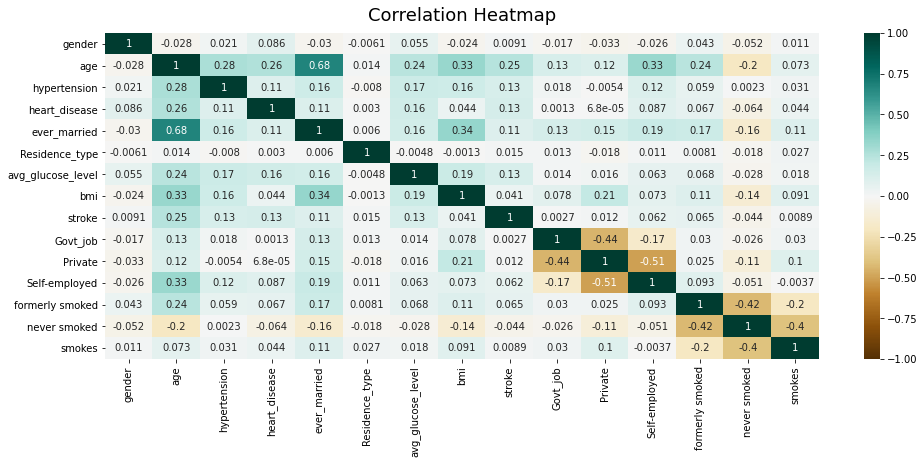

In [116]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(encoded_dataset.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

<li>From the heat map, we can validate that there is no correlation among the explanatory variables</li>
<li>Hence, there is no multicollinearity in the data</li>

<li><b>Assumption 3: There is no extreme outliers</b></li>
<li>We have deal with the outliers properly in avg_glucose_level column and bmi column.</li>
<li>We have use IQR(Inter quantile range) to detect extreme outliers and replace them with the mean of the outliers values</li>
<li>We can not remove the outliers because outliers play a vital role in predicting the target variables</li>


In [112]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
#Predict the response for test dataset
y_pred = clf.predict(x_test.values)

print("Roc Auc Score : ",roc_auc_score(y_test, y_pred))

Roc Auc Score :  0.7772839506172838


In [114]:
confusion_matrix(y_test,y_pred)

array([[714, 258],
       [  9,  41]])

In [115]:
from sklearn.metrics import classification_report
target_names = ["not_stroke","stroke"]
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

  not_stroke     0.9876    0.7346    0.8425       972
      stroke     0.1371    0.8200    0.2350        50

    accuracy                         0.7387      1022
   macro avg     0.5623    0.7773    0.5387      1022
weighted avg     0.9459    0.7387    0.8128      1022



**<h4>Fine Tuning Logistic Regression Model</h4>**

In [72]:
log_model = LogisticRegression()

In [73]:
param_grid = [
              {'penalty': ['l2','elasticnet','none'],
               'C': np.logspace(-4,4,20),
               'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
               'max_iter': [100,1000,2500,5000]
               }
]

In [74]:
clf = GridSearchCV(log_model,param_grid=param_grid,cv=3,verbose=True,n_jobs=-1)

In [83]:
features = pd.concat([encoded_dataset.iloc[:,:8],encoded_dataset.iloc[:,9:]],axis=1)
target = encoded_dataset.iloc[:,8:9]

In [84]:
best_clf = clf.fit(features,target)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 654 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1750 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 2435 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 3198 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 22.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [85]:
best_clf.best_estimator_

LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
tuned_log_model = LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

tuned_log_model.fit(x_train,y_train)

LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
#Predict the response for test dataset
y_pred = tuned_log_model.predict(x_test.values)

print("Roc Auc Score : ",roc_auc_score(y_test, y_pred))

Accuracy: 0.7426614481409002
Precision Score :  0.7426614481409002
Recall Score :  0.7426614481409002
Roc Auc Score :  0.7698559670781893


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



In [96]:
confusion_matrix(y_test,y_pred)

array([[719, 253],
       [ 10,  40]])

<li>We can see our performance didnot increase after fine tuning the hyperparameters.</li>

**<h4>Conclusion</h4>**


<li><b>On our first hypothesis, we have thought bmi would be a good indicator or measure in predicting the likelihood of getting a stroke.</b?</li>

<li><b>But, according to the data, there are many outliers in the bmi column and found as a weak feature for our target which is against the medical use case.</b></li>

<li><b>Accuracy metric is not a good metric to choose for imbalance datasets.</b></li>

<li><b>F1 score and Roc-Auc score is a reliable metric for class imbalance problem like ours</b></li>

<li><b>Oversampling techniques like Smote are really good tools to use incase of class imbalance problems.</b></li>

<li><b>Logistic Regression model and SVM model are the top performing models with ROC-AUC score of around 77% and a F1 score of around 0.23.</b></li>

<li><b>More features can be added to the dataset such as the patient's exercise pattern, blood pressure and so on.</b></li>

<li><b>This model is best suited for  the prognosis of stroke prediction.</b></li>

<li><b>Since it has high recall and low precision, early signs or predictions of  getting a stroke can be useful for the patient to take care of their health problems even more seriously.</b></li>
